In [119]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math, warnings
from sklearn import linear_model, naive_bayes, svm, model_selection
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import seaborn as sn
from sklearn.metrics import classification_report

In [120]:
df_train = pd.read_csv("dataWorkstyle-training.csv") 
df_test = pd.read_csv("user-response-test.csv") 

In [219]:
X = df_train[['investmentStart','returnTime','workStyle','companySize','capitalInstalacao','totalUnits']]
X_test = df_test[['investmentStart','returnTime','workStyle','companySize','capitalInstalacao','totalUnits']]
y = df_train['company'] 

investmentStartFilter =  X['investmentStart'] <= (X_test['investmentStart'][0] * 1.3)
X_filter = X[investmentStartFilter]

X_filter = X_filter.loc[(X_filter != 0).all()]
X_filter

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [174]:
X_norm =(X-X.mean())/X.std()


In [175]:
model = linear_model.LogisticRegression(random_state=0).fit(X_norm, y)
result = model.score(X_norm, y)


C:\Users\Naiane Negri\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [176]:

X_test_norm =(X_test-X_test.mean())/X_test.std()


,investmentStart,returnTime,workStyle,companySize,capitalInstalacao,totalUnits
0,-11.027604,-0.476731,0.408248,-0.221404,-0.339032,-0.740403
1,-21.052698,0.476731,0.408248,1.107019,-0.847579,-0.740403
2,19.047679,0.476731,-2.041241,-1.549826,0.678064,1.705422
3,-15.037641,-0.476731,0.408248,-0.221404,-0.847579,-0.640573
4,29.072773,1.430194,0.408248,1.107019,1.695159,0.707126
5,-1.002509,-1.430194,0.408248,-0.221404,-0.339032,-0.291170


In [177]:
y_test = model.predict(X_test_norm)
valid_x_df = pd.DataFrame(X_test_norm)
valid_y_df = pd.DataFrame(y_test)


In [178]:
n=5

probas = model.predict_proba(X_test_norm)


top_n_predictions = np.argsort(probas, axis = 1)[:,-n:]

top_class = model.classes_[top_n_predictions]

top_class_df = pd.DataFrame(data=top_class)
results = pd.merge(valid_y_df, valid_x_df, left_index=True, right_index=True)
results = pd.merge(results, top_class_df, left_index=True, right_index=True)



In [179]:
results

,0_x,investmentStart,returnTime,workStyle,companySize,capitalInstalacao,totalUnits,0_y,1,2,3,4
0,cheflera,-11.027604,-0.476731,0.408248,-0.221404,-0.339032,-0.740403,bittencourt inteligencia em redes de negocios,a fabrica de vendas,aw contabil,antilhas embalagens,cheflera
1,brewtainer,-21.052698,0.476731,0.408248,1.107019,-0.847579,-0.740403,bidon corretora de seguros,ara moveis,casagroup,beetools the language school,brewtainer
2,bobs,19.047679,0.476731,-2.041241,-1.549826,0.678064,1.705422,am pm,casa do construtor,arezzo co,bibi,bobs
3,ara moveis,-15.037641,-0.476731,0.408248,-0.221404,-0.847579,-0.640573,antilhas embalagens,bittencourt inteligencia em redes de negocios,a fabrica de vendas,beetools the language school,ara moveis
4,billy the grill,29.072773,1.430194,0.408248,1.107019,1.695159,0.707126,anjos colchoes,franquia aramis mensawear,bobs,casa do construtor,billy the grill
5,campinas celulares,-1.002509,-1.430194,0.408248,-0.221404,-0.339032,-0.291170,american cookies,bar do urso,ad clinic estetica e bemestar,arranjos express,campinas celulares


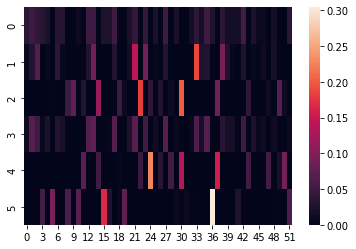

In [180]:
plot = sn.heatmap(probas, annot=False, fmt=".2f")